In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


df = pd.read_csv('data/usina.csv')

df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# DF analysis

    AT -> Air Temperature
    V -> Velocidade (Wind Speed)
    AP -> Atmospheric Pressure (in hPa)
    RH -> Relative Humidity (in %)
    PE -> Power Output

In [284]:
df = df.rename(columns={'AT': 'Air_Temperature', 
                        'V':'Wind_Speed', 'AP' : 
                        'Atmospheric_Pressure', 
                        'RH': 'Relative Humidity', 
                        'PE': 'Power_Output'})
df.head()

,Air_Temperature,Wind_Speed,Atmospheric_Pressure,Relative Humidity,Power_Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## Correlaction -> comparing with the var PE

In [285]:
corr = df.corr()
corr ['Power_Output']

Air_Temperature        -0.948128
Wind_Speed             -0.869780
Atmospheric_Pressure    0.518429
Relative Humidity       0.389794
Power_Output            1.000000
Name: Power_Output, dtype: float64

### PLOT

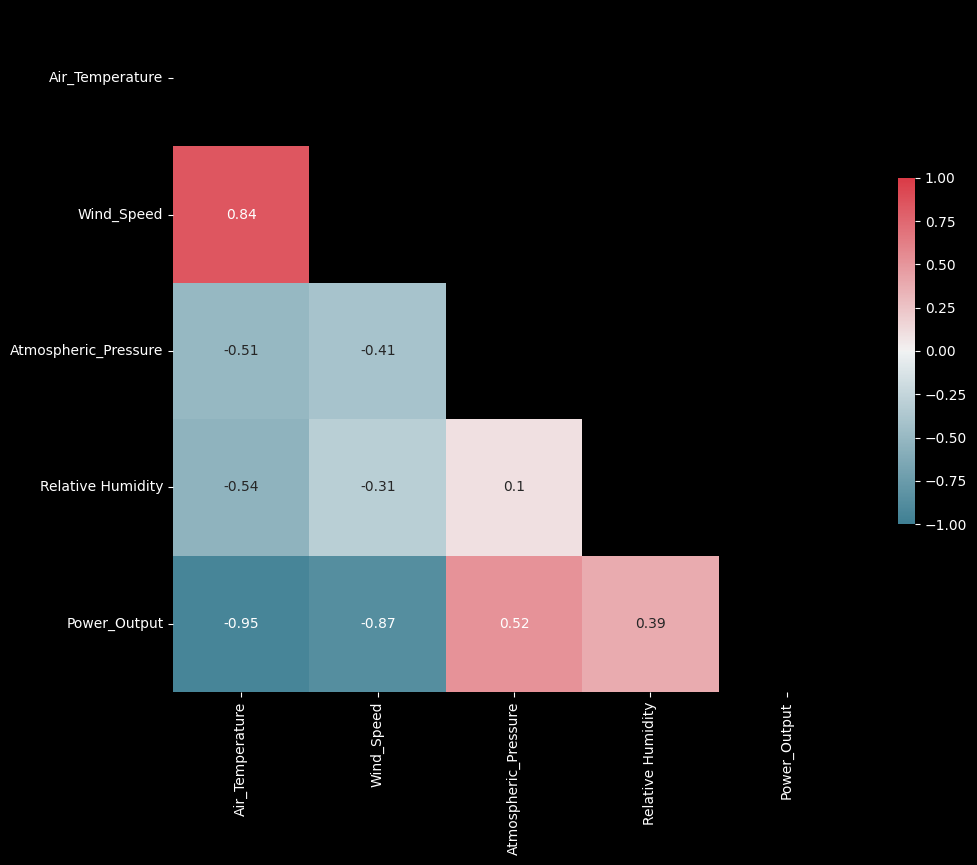

In [286]:
plt.style.use('dark_background')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0, annot=True, cbar_kws={"shrink": .5})

plt.show()

# Analysis
    We can see that
    the higher the wind speed, the higher the air temperature. 
    the lower the atmospheric temperature, the lower the air temperature and wind speed.
    the lower the relative humidity, the higher the air temperature and the lower the wind speed.
    Power outpt is directly related to air temperature, wind speed, atmospheric pressure and relative humidity
        - Negative for air temperature and wind speed 
        - And positive for atmospheric pressure and relative humidity

/tmp/ipykernel_117054/1945798470.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




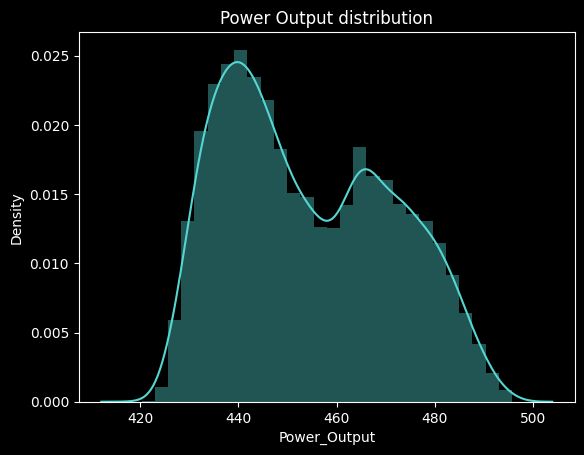

In [287]:
sns.distplot(df["Power_Output"], kde=True, color="#54d6d2")
plt.title("Power Output distribution")
plt.show()

# Starting the linear regression model (using scikit-learn)

In [288]:
y = df['Power_Output']

x = df.drop(columns='Power_Output')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=573)

## Model

In [289]:
x_train = sm.add_constant(x_train)

model = sm.OLS(y_train,x_train).fit()

model.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Power_Output   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.494e+04
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:39:28   Log-Likelihood:                -22457.
No. Observations:                7654   AIC:                         4.492e+04
Df Residuals:                    7649   BIC:                         4.496e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  457.0330     10.838     42.170      0.000     435.788     478.278
Air_Temperature         -1.9797      0.017   -115.828      0.000      -2.013      -1.946
Wind_Speed              -0.2325      0.008    -28.648      0.000      -0.248      -0.217
Atmospheric_Pressure     0.0596      0.011      5.666      0.000       0.039       0.080
Relative Humidity       -0.1574      0.005    -33.869      0.000      -0.167      -0.148
==============================================================================
Omnibus:                      748.562   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3458.588
Skew:                          -0.376   Prob(JB):                         0.00
Kurtosis:                       6.206   Cond. No.                     2.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### **R² score + VIF**

In [290]:
print('Model R² -->',model.rsquared)

Model R² --> 0.9287751101539058


**VIF calculation to check for signs of multicolinearity.**

In [291]:
x_train_vif = x_train.drop(columns='const')

exp =['Air_Temperature', 'Wind_Speed',
        'Atmospheric_Pressure',
         'Relative Humidity']

vif= pd.DataFrame()

vif['var'] = exp

vif["vif"] = [variance_inflation_factor(x_train[exp].values, i) for i in range(len(exp))]

In [292]:
vif

,var,vif
0,Air_Temperature,39.241230
1,Wind_Speed,74.868440
2,Atmospheric_Pressure,66.857711
3,Relative Humidity,40.592181


## The VIF indicates a strong presence of multicollinearity due to the high values (> 5)

## **Waste calculate**

In [293]:
y_predict_train = model.predict(x_train)

waste = model.resid

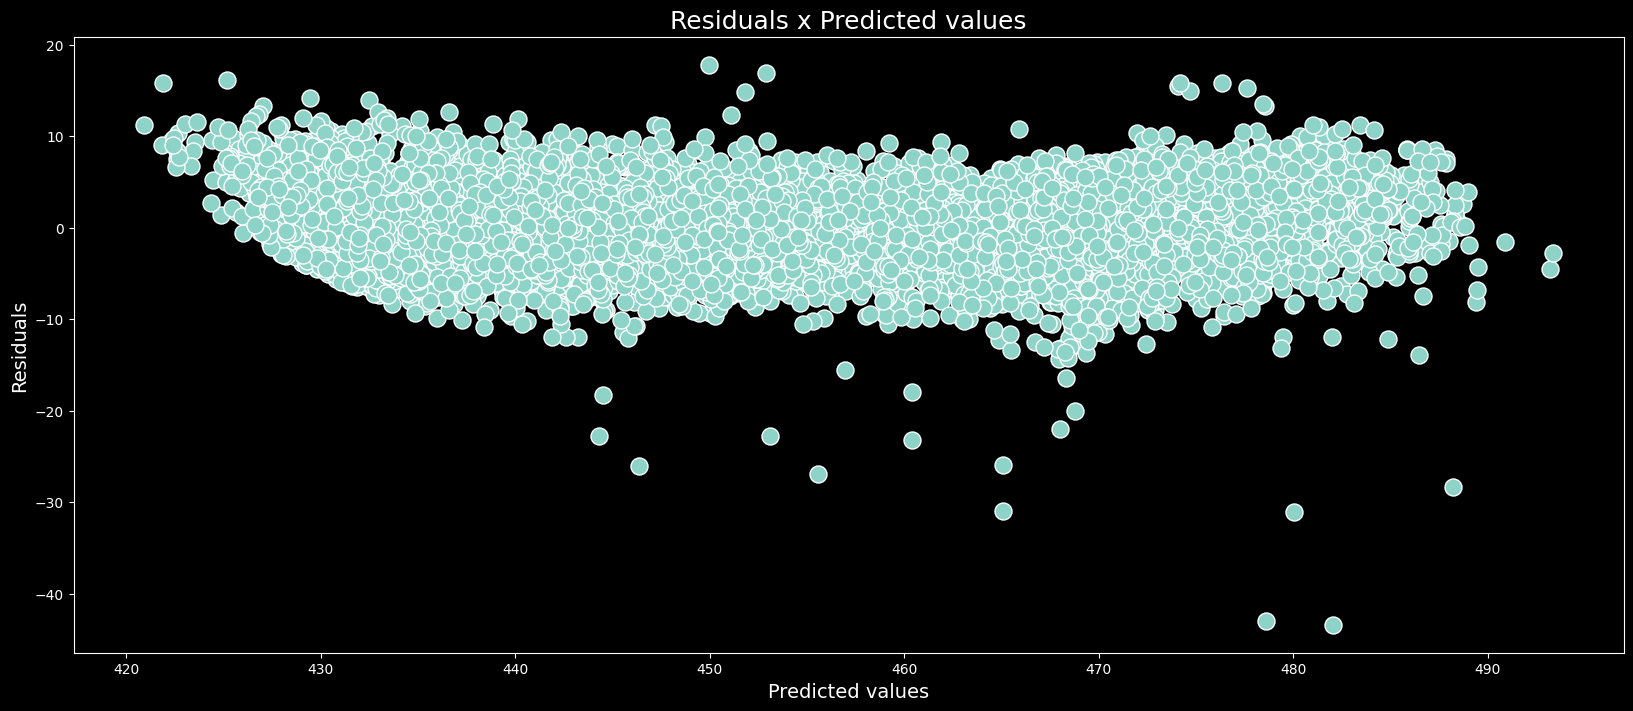

In [294]:

ax = sns.scatterplot(x=y_predict_train, y=waste, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Residuals x Predicted values', fontsize=18)
ax.set_xlabel('Predicted values', fontsize=14)
ax.set_ylabel('Residuals', fontsize=14)
plt.show()


# *Conclusion -> The model shows signs of heteroscedasticity*